In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('deals.csv')

In [3]:
df.head(5)

,ENTRY_DATE,DEAL_NUMBER,ENTITY_NO,BUY_ITEM,SELL_ITEM,EXCHANGE_RATE,MARKET_RATE,SPREAD,VOLUME,REVENUE,FEES,TYPE,VALUE_DATE,IS_TRANSACTION,DEAL TYPE,ONLINE_DEAL,CURRENCY
0,10/17/2018,TMP-USA-DEAL-0224687,11092,USD,EUR,1.1640,1.1518,6.23,594.8,6.23,0.0,Spot,10/18/2018,1,NaN,NO,EUR
1,10/17/2018,TMP-USA-DEAL-0224687,11092,USD,EUR,1.1640,1.1518,183.00,17460.0,183.00,0.0,Spot,10/18/2018,1,NaN,NO,EUR
2,5/12/2016,TMP-USA-DEAL-0046450,11092,EUR,EUR,1.0000,1.0000,NaN,NaN,NaN,0.0,Tomorrow,5/13/2016,0,NaN,NO,EUR
3,9/28/2016,TMP-USA-DEAL-0069456,11092,USD,EUR,1.1317,1.1228,445.00,56585.0,445.00,20.0,Spot,9/29/2016,1,NaN,NO,EUR
4,1/3/2017,TMP-USA-DEAL-0086283,11092,USD,EUR,1.0506,1.0422,252.00,31518.0,252.00,20.0,Spot,1/4/2017,1,NaN,NO,EUR


In [4]:
df['Transaction'] = df.apply(lambda x: (x.BUY_ITEM, x.SELL_ITEM), axis=1)

In [5]:
df.head(5)

,ENTRY_DATE,DEAL_NUMBER,ENTITY_NO,BUY_ITEM,SELL_ITEM,EXCHANGE_RATE,MARKET_RATE,SPREAD,VOLUME,REVENUE,FEES,TYPE,VALUE_DATE,IS_TRANSACTION,DEAL TYPE,ONLINE_DEAL,CURRENCY,Transaction
0,10/17/2018,TMP-USA-DEAL-0224687,11092,USD,EUR,1.1640,1.1518,6.23,594.8,6.23,0.0,Spot,10/18/2018,1,NaN,NO,EUR,"(USD, EUR)"
1,10/17/2018,TMP-USA-DEAL-0224687,11092,USD,EUR,1.1640,1.1518,183.00,17460.0,183.00,0.0,Spot,10/18/2018,1,NaN,NO,EUR,"(USD, EUR)"
2,5/12/2016,TMP-USA-DEAL-0046450,11092,EUR,EUR,1.0000,1.0000,NaN,NaN,NaN,0.0,Tomorrow,5/13/2016,0,NaN,NO,EUR,"(EUR, EUR)"
3,9/28/2016,TMP-USA-DEAL-0069456,11092,USD,EUR,1.1317,1.1228,445.00,56585.0,445.00,20.0,Spot,9/29/2016,1,NaN,NO,EUR,"(USD, EUR)"
4,1/3/2017,TMP-USA-DEAL-0086283,11092,USD,EUR,1.0506,1.0422,252.00,31518.0,252.00,20.0,Spot,1/4/2017,1,NaN,NO,EUR,"(USD, EUR)"


In [6]:
cc = df.groupby('Transaction').size()
valid_trans = cc[cc > 400]

In [7]:
s = valid_trans.index.values
s = np.apply_along_axis(lambda x: list(x), 0, s)
a = s[:,0]
b = s[:,1]
ss = list(set(s.flatten()))
s_dict = {ss[i]: i for i in range(len(ss))}
aa = [ss.index(x) for x in a]
bb = [ss.index(x) for x in b]
cc = valid_trans.values/30

Text(0, 0.5, 'Transaction To')

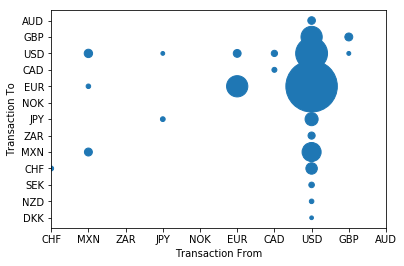

In [17]:
plt.scatter(aa, bb, cc)
plt.xticks(np.arange(len(ss)), ss)
plt.yticks(np.arange(len(ss)), ss)
plt.xlim([3,len(ss)-1])
plt.xlabel('Transaction From')
plt.ylabel('Transaction To')

In [23]:
df_USD2EUR = df[df.Transaction == ('USD','EUR')]

In [24]:
df_USD2EUR.MARKET_RATE.describe()

count    79525.000000
mean         1.142791
std          0.049938
min          0.718123
25%          1.108900
50%          1.139900
75%          1.177300
max          1.280600
Name: MARKET_RATE, dtype: float64

In [31]:
df_USD2EUR.VOLUME.describe()
df_USD2EUR = df_USD2EUR[df_USD2EUR.VOLUME < 1e4]